In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment2/'
FOLDERNAME = 'cs231n/assignments/assignment2/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
!bash get_datasets.sh
%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/cs231n/assignments/assignment2/cs231n/datasets
/content/drive/My Drive/cs231n/assignments/assignment2


# Multi-Layer Fully Connected Network
In this exercise, you will implement a fully connected network with an arbitrary number of hidden layers.

Read through the `FullyConnectedNet` class in the file `cs231n/classifiers/fc_net.py`.

Implement the network initialization, forward pass, and backward pass. Throughout this assignment, you will be implementing layers in `cs231n/layers.py`. You can re-use your implementations for `affine_forward`, `affine_backward`, `relu_forward`, `relu_backward`, and `softmax_loss` from Assignment 1. For right now, don't worry about implementing dropout or batch/layer normalization yet, as you will add those features later.


In [2]:
# Setup cell.
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # Set default size of plots.
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """Returns relative error."""
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

=========== You can safely ignore the message below if you are NOT working on ConvolutionalNetworks.ipynb ===========
	You will need to compile a Cython extension for a portion of this assignment.
	The instructions to do this will be given in a section of the notebook below.


In [3]:
# Load the (preprocessed) CIFAR-10 data.
data = get_CIFAR10_data()
for k, v in list(data.items()):
    print(f"{k}: {v.shape}")

X_train: (49000, 3, 32, 32)
y_train: (49000,)
X_val: (1000, 3, 32, 32)
y_val: (1000,)
X_test: (1000, 3, 32, 32)
y_test: (1000,)


## Initial Loss and Gradient Check

As a sanity check, run the following to check the initial loss and to gradient check the network both with and without regularization. This is a good way to see if the initial losses seem reasonable.

For gradient checking, you should expect to see errors around 1e-7 or less.

In [ ]:
#다음은 정답코드입니다.
from builtins import range
from re import S
import numpy as np


def affine_forward(x, w, b):
    """Computes the forward pass for an affine (fully connected) layer.

    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). We will
    reshape each input into a vector of dimension D = d_1 * ... * d_k, and
    then transform it to an output vector of dimension M.

    Inputs:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (x, w, b)
    """
    out = None
    ###########################################################################
    # TODO: Copy over your solution from Assignment 1.                        #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    num_train = x.shape[0]
    out = np.dot(np.reshape(x, [num_train,-1]), w) + b

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b)
    return out, cache


def affine_backward(dout, cache):
    """Computes the backward pass for an affine (fully connected) layer.

    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
      - x: Input data, of shape (N, d_1, ... d_k)
      - w: Weights, of shape (D, M)
      - b: Biases, of shape (M,)

    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """
    x, w, b = cache
    dx, dw, db = None, None, None
    ###########################################################################
    # TODO: Copy over your solution from Assignment 1.                        #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    dx = np.reshape(np.dot(dout, w.T), x.shape)
    dw = np.dot(np.reshape(x,[x.shape[0],-1]).T,dout)
    db = np.sum(dout,axis=0)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dw, db


def relu_forward(x):
    """Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    out = None
    ###########################################################################
    # TODO: Copy over your solution from Assignment 1.                        #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    out = np.maximum(0, x)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = x
    return out, cache


def relu_backward(dout, cache):
    """Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    dx, x = None, cache
    ###########################################################################
    # TODO: Copy over your solution from Assignment 1.                        #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    dx = dout * (x > 0)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx


def softmax_loss(x, y):
    """Computes the loss and gradient for softmax classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
      class for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    loss, dx = None, None

    ###########################################################################
    # TODO: Copy over your solution from Assignment 1.                        #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    num_train = x.shape[0]
    x_c = x - np.reshape(np.max(x,axis=1),[-1,1])

    y_mask = np.zeros_like(x,dtype='bool')
    y_mask[np.arange(num_train),y] = True
    x_correct = x_c[y_mask]
    loss = -np.sum(np.log(np.exp(x_correct) / (1e-7 + np.sum(np.exp(x_c),axis=1))))
    loss /= num_train

    dx = np.zeros_like(x)
    dx += np.exp(x_c) / (1e-7 + np.reshape(np.sum(np.exp(x_c),axis=1),[-1,1]))
    dx[y_mask] -= 1
    dx /= num_train

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return loss, dx


def batchnorm_forward(x, gamma, beta, bn_param):
    """Forward pass for batch normalization.

    During training the sample mean and (uncorrected) sample variance are
    computed from minibatch statistics and used to normalize the incoming data.
    During training we also keep an exponentially decaying running mean of the
    mean and variance of each feature, and these averages are used to normalize
    data at test-time.

    At each timestep we update the running averages for mean and variance using
    an exponential decay based on the momentum parameter:

    running_mean = momentum * running_mean + (1 - momentum) * sample_mean
    running_var = momentum * running_var + (1 - momentum) * sample_var

    Note that the batch normalization paper suggests a different test-time
    behavior: they compute sample mean and variance for each feature using a
    large number of training images rather than using a running average. For
    this implementation we have chosen to use running averages instead since
    they do not require an additional estimation step; the torch7
    implementation of batch normalization also uses running averages.

    Input:
    - x: Data of shape (N, D)
    - gamma: Scale parameter of shape (D,)
    - beta: Shift paremeter of shape (D,)
    - bn_param: Dictionary with the following keys:
      - mode: 'train' or 'test'; required
      - eps: Constant for numeric stability
      - momentum: Constant for running mean / variance.
      - running_mean: Array of shape (D,) giving running mean of features
      - running_var Array of shape (D,) giving running variance of features

    Returns a tuple of:
    - out: of shape (N, D)
    - cache: A tuple of values needed in the backward pass
    """
    mode = bn_param["mode"]
    eps = bn_param.get("eps", 1e-5)
    momentum = bn_param.get("momentum", 0.9)

    N, D = x.shape
    running_mean = bn_param.get("running_mean", np.zeros(D, dtype=x.dtype))
    running_var = bn_param.get("running_var", np.zeros(D, dtype=x.dtype))

    out, cache = None, None
    if mode == "train":
        #######################################################################
        # TODO: Implement the training-time forward pass for batch norm.      #
        # Use minibatch statistics to compute the mean and variance, use      #
        # these statistics to normalize the incoming data, and scale and      #
        # shift the normalized data using gamma and beta.                     #
        #                                                                     #
        # You should store the output in the variable out. Any intermediates  #
        # that you need for the backward pass should be stored in the cache   #
        # variable.                                                           #
        #                                                                     #
        # You should also use your computed sample mean and variance together #
        # with the momentum variable to update the running mean and running   #
        # variance, storing your result in the running_mean and running_var   #
        # variables.                                                          #
        #                                                                     #
        # Note that though you should be keeping track of the running         #
        # variance, you should normalize the data based on the standard       #
        # deviation (square root of variance) instead!                        #
        # Referencing the original paper (https://arxiv.org/abs/1502.03167)   #
        # might prove to be helpful.                                          #
        #######################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        sample_mean = np.mean(x,axis=0)
        sample_var = np.var(x,axis=0)

        running_mean = momentum * running_mean + (1 - momentum) * np.mean(x,axis=0)
        running_var = momentum * running_var + (1 - momentum) * sample_var

        x_normal = (x - sample_mean) / np.sqrt(sample_var + eps)
        out = gamma * x_normal + beta

        cache = (x, sample_mean, sample_var, gamma)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        #######################################################################
        #                           END OF YOUR CODE                          #
        #######################################################################
    elif mode == "test":
        #######################################################################
        # TODO: Implement the test-time forward pass for batch normalization. #
        # Use the running mean and variance to normalize the incoming data,   #
        # then scale and shift the normalized data using gamma and beta.      #
        # Store the result in the out variable.                               #
        #######################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        x_normal = (x - running_mean) / np.sqrt(running_var + eps)
        out = gamma * x_normal + beta

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        #######################################################################
        #                          END OF YOUR CODE                           #
        #######################################################################
    else:
        raise ValueError('Invalid forward batchnorm mode "%s"' % mode)

    # Store the updated running means back into bn_param
    bn_param["running_mean"] = running_mean
    bn_param["running_var"] = running_var

    return out, cache


def batchnorm_backward(dout, cache):
    """Backward pass for batch normalization.

    For this implementation, you should write out a computation graph for
    batch normalization on paper and propagate gradients backward through
    intermediate nodes.

    Inputs:
    - dout: Upstream derivatives, of shape (N, D)
    - cache: Variable of intermediates from batchnorm_forward.

    Returns a tuple of:
    - dx: Gradient with respect to inputs x, of shape (N, D)
    - dgamma: Gradient with respect to scale parameter gamma, of shape (D,)
    - dbeta: Gradient with respect to shift parameter beta, of shape (D,)
    """
    dx, dgamma, dbeta = None, None, None
    ###########################################################################
    # TODO: Implement the backward pass for batch normalization. Store the    #
    # results in the dx, dgamma, and dbeta variables.                         #
    # Referencing the original paper (https://arxiv.org/abs/1502.03167)       #
    # might prove to be helpful.                                              #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    eps = 1e-5
    N = dout.shape[0]
    x, sample_mean, sample_var, gamma = cache
    x_normal = (x - sample_mean) / np.sqrt(sample_var + eps)
    dgamma = np.sum(dout * x_normal, axis = 0)
    dbeta = np.sum(dout, axis = 0)
    dx_normal = dout * gamma
    dlvar = np.sum(dx_normal * (x - sample_mean) * -0.5 * (sample_var + eps)**-1.5, axis = 0)
    dlmean = np.sum(dx_normal * -1 / np.sqrt(sample_var + eps) , axis = 0)
    + dlvar * np.sum(-2 * (x - sample_mean), axis = 0) / N
    dx = dx_normal * 1 / np.sqrt(sample_var + eps) + dlvar * 2 * (x - sample_mean) / N + dlmean / N

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    return dx, dgamma, dbeta


def batchnorm_backward_alt(dout, cache):
    """Alternative backward pass for batch normalization.

    For this implementation you should work out the derivatives for the batch
    normalizaton backward pass on paper and simplify as much as possible. You
    should be able to derive a simple expression for the backward pass.
    See the jupyter notebook for more hints.

    Note: This implementation should expect to receive the same cache variable
    as batchnorm_backward, but might not use all of the values in the cache.

    Inputs / outputs: Same as batchnorm_backward
    """
    dx, dgamma, dbeta = None, None, None
    ###########################################################################
    # TODO: Implement the backward pass for batch normalization. Store the    #
    # results in the dx, dgamma, and dbeta variables.                         #
    #                                                                         #
    # After computing the gradient with respect to the centered inputs, you   #
    # should be able to compute gradients with respect to the inputs in a     #
    # single statement; our implementation fits on a single 80-character line.#
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    eps = 1e-5
    N = dout.shape[0]
    x, running_mean, running_var, gamma = cache
    x_normal = (x - running_mean) / np.sqrt(running_var + eps)
    dgamma = np.sum(dout * x_normal, axis = 0)
    dbeta = np.sum(dout, axis = 0)
    dx_normal = dout * gamma
    dlvar = np.sum(dx_normal * (x - running_mean) * -0.5 * (running_var + eps)**-1.5, axis = 0)
    dlmean = np.sum(dx_normal * -1 / np.sqrt(running_var + eps) , axis = 0)
    + dlvar * np.sum(-2 * (x - running_mean), axis = 0) / N
    dx = dx_normal * 1 / np.sqrt(running_var + eps) + dlvar * 2 * (x - running_mean) / N + dlmean / N

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    return dx, dgamma, dbeta


def layernorm_forward(x, gamma, beta, ln_param):
    """Forward pass for layer normalization.

    During both training and test-time, the incoming data is normalized per data-point,
    before being scaled by gamma and beta parameters identical to that of batch normalization.

    Note that in contrast to batch normalization, the behavior during train and test-time for
    layer normalization are identical, and we do not need to keep track of running averages
    of any sort.

    Input:
    - x: Data of shape (N, D)
    - gamma: Scale parameter of shape (D,)
    - beta: Shift paremeter of shape (D,)
    - ln_param: Dictionary with the following keys:
        - eps: Constant for numeric stability

    Returns a tuple of:
    - out: of shape (N, D)
    - cache: A tuple of values needed in the backward pass
    """
    out, cache = None, None
    eps = ln_param.get("eps", 1e-5)
    ###########################################################################
    # TODO: Implement the training-time forward pass for layer norm.          #
    # Normalize the incoming data, and scale and  shift the normalized data   #
    #  using gamma and beta.                                                  #
    # HINT: this can be done by slightly modifying your training-time         #
    # implementation of  batch normalization, and inserting a line or two of  #
    # well-placed code. In particular, can you think of any matrix            #
    # transformations you could perform, that would enable you to copy over   #
    # the batch norm code and leave it almost unchanged?                      #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    feature_mean = np.mean(x,axis=1)[:,np.newaxis]
    feature_var = np.var(x,axis=1)[:,np.newaxis]

    x_normal = (x - feature_mean) / np.sqrt(feature_var + eps)
    out = gamma * x_normal + beta

    cache = (x, feature_mean, feature_var, gamma)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return out, cache


def layernorm_backward(dout, cache):
    """Backward pass for layer normalization.

    For this implementation, you can heavily rely on the work you've done already
    for batch normalization.

    Inputs:
    - dout: Upstream derivatives, of shape (N, D)
    - cache: Variable of intermediates from layernorm_forward.

    Returns a tuple of:
    - dx: Gradient with respect to inputs x, of shape (N, D)
    - dgamma: Gradient with respect to scale parameter gamma, of shape (D,)
    - dbeta: Gradient with respect to shift parameter beta, of shape (D,)
    """
    dx, dgamma, dbeta = None, None, None
    ###########################################################################
    # TODO: Implement the backward pass for layer norm.                       #
    #                                                                         #
    # HINT: this can be done by slightly modifying your training-time         #
    # implementation of batch normalization. The hints to the forward pass    #
    # still apply!                                                            #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    eps = 1e-5
    N = dout.shape[1]
    x, feature_mean, feature_var, gamma = cache
    x_normal = (x - feature_mean) / np.sqrt(feature_var + eps)
    dgamma = np.sum(dout * x_normal, axis = 0)
    dbeta = np.sum(dout, axis = 0)
    dx_normal = dout * gamma

    dlvar = np.sum(dx_normal * (x - feature_mean)
    * -0.5 * (feature_var + eps)**-1.5, axis = 1)[:,np.newaxis]

    dlmean = np.sum(dx_normal * -1 / np.sqrt(feature_var + eps) , axis = 1)[:,np.newaxis]
    + dlvar * np.sum(-2 * (x - feature_mean), axis = 1)[:,np.newaxis] / N

    dx = dx_normal * 1 / np.sqrt(feature_var + eps) + dlvar * 2 * (x - feature_mean) / N + dlmean / N

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dgamma, dbeta


def dropout_forward(x, dropout_param):
    """Forward pass for inverted dropout.

    Note that this is different from the vanilla version of dropout.
    Here, p is the probability of keeping a neuron output, as opposed to
    the probability of dropping a neuron output.
    See http://cs231n.github.io/neural-networks-2/#reg for more details.

    Inputs:
    - x: Input data, of any shape
    - dropout_param: A dictionary with the following keys:
      - p: Dropout parameter. We keep each neuron output with probability p.
      - mode: 'test' or 'train'. If the mode is train, then perform dropout;
        if the mode is test, then just return the input.
      - seed: Seed for the random number generator. Passing seed makes this
        function deterministic, which is needed for gradient checking but not
        in real networks.

    Outputs:
    - out: Array of the same shape as x.
    - cache: tuple (dropout_param, mask). In training mode, mask is the dropout
      mask that was used to multiply the input; in test mode, mask is None.
    """
    p, mode = dropout_param["p"], dropout_param["mode"]
    if "seed" in dropout_param:
        np.random.seed(dropout_param["seed"])

    mask = None
    out = None

    if mode == "train":
        #######################################################################
        # TODO: Implement training phase forward pass for inverted dropout.   #
        # Store the dropout mask in the mask variable.                        #
        #######################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        mask = (np.random.random_sample(x.shape) < p) / p
        out = mask * x

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        #######################################################################
        #                           END OF YOUR CODE                          #
        #######################################################################
    elif mode == "test":
        #######################################################################
        # TODO: Implement the test phase forward pass for inverted dropout.   #
        #######################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        out = x

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        #######################################################################
        #                            END OF YOUR CODE                         #
        #######################################################################

    cache = (dropout_param, mask)
    out = out.astype(x.dtype, copy=False)

    return out, cache


def dropout_backward(dout, cache):
    """Backward pass for inverted dropout.

    Inputs:
    - dout: Upstream derivatives, of any shape
    - cache: (dropout_param, mask) from dropout_forward.
    """
    dropout_param, mask = cache
    mode = dropout_param["mode"]

    dx = None
    if mode == "train":
        #######################################################################
        # TODO: Implement training phase backward pass for inverted dropout   #
        #######################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        dx = dout * mask

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        #######################################################################
        #                          END OF YOUR CODE                           #
        #######################################################################
    elif mode == "test":
        dx = dout
    return dx


def conv_forward_naive(x, w, b, conv_param):
    """A naive implementation of the forward pass for a convolutional layer.

    The input consists of N data points, each with C channels, height H and
    width W. We convolve each input with F different filters, where each filter
    spans all C channels and has height HH and width WW.

    Input:
    - x: Input data of shape (N, C, H, W)
    - w: Filter weights of shape (F, C, HH, WW)
    - b: Biases, of shape (F,)
    - conv_param: A dictionary with the following keys:
      - 'stride': The number of pixels between adjacent receptive fields in the
        horizontal and vertical directions.
      - 'pad': The number of pixels that will be used to zero-pad the input.

    During padding, 'pad' zeros should be placed symmetrically (i.e equally on both sides)
    along the height and width axes of the input. Be careful not to modfiy the original
    input x directly.

    Returns a tuple of:
    - out: Output data, of shape (N, F, H', W') where H' and W' are given by
      H' = 1 + (H + 2 * pad - HH) / stride
      W' = 1 + (W + 2 * pad - WW) / stride
    - cache: (x, w, b, conv_param)
    """
    out = None
    ###########################################################################
    # TODO: Implement the convolutional forward pass.                         #
    # Hint: you can use the function np.pad for padding.                      #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    pad = conv_param['pad']
    stride = conv_param['stride']

    N = x.shape[0]
    F = w.shape[0]
    HH = w.shape[2]
    WW = w.shape[3]
    H_out = 1 + (x.shape[2] + 2 * pad - HH) // stride
    W_out = 1 + (x.shape[3] + 2 * pad - WW) // stride

    x_pad = np.pad(x,[(0,0),(0,0),(pad,pad),(pad,pad)])
    out = np.zeros([N,F,H_out,W_out])

    for n in range(N):
      for f in range(F):
        for i in range(H_out):
          for j in range(W_out):
            h_start = i * stride
            w_start = j * stride
            out[n][f][i][j] = np.sum(x_pad[n,:,h_start:h_start+HH, w_start:w_start+WW] * w[f,:,:,:]) + b[f]

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b, conv_param)
    return out, cache


def conv_backward_naive(dout, cache):
    """A naive implementation of the backward pass for a convolutional layer.

    Inputs:
    - dout: Upstream derivatives.
    - cache: A tuple of (x, w, b, conv_param) as in conv_forward_naive

    Returns a tuple of:
    - dx: Gradient with respect to x
    - dw: Gradient with respect to w
    - db: Gradient with respect to b
    """
    dx, dw, db = None, None, None
    ###########################################################################
    # TODO: Implement the convolutional backward pass.                        #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    x, w, b, conv_param = cache

    pad = conv_param['pad']
    stride = conv_param['stride']

    N = x.shape[0]
    F = w.shape[0]
    HH = w.shape[2]
    WW = w.shape[3]
    H_out = 1 + (x.shape[2] + 2 * pad - HH) // stride
    W_out = 1 + (x.shape[3] + 2 * pad - WW) // stride

    x_pad = np.pad(x,[(0,0),(0,0),(pad,pad),(pad,pad)])
    dw = np.zeros_like(w)
    dx = np.zeros_like(x_pad)
    db = np.zeros_like(b)

    for n in range(N):
      for f in range(F):
        for i in range(H_out):
          for j in range(W_out):
            h_start = i * stride
            w_start = j * stride
            db[f] += dout[n][f][i][j]
            dw[f,:,:,:] += dout[n][f][i][j] * x_pad[n,:,h_start:h_start+HH, w_start:w_start+WW]
            dx[n,:,h_start:h_start+HH, w_start:w_start+WW] += dout[n][f][i][j] * w[f,:,:,:]

    dx = dx[:,:,pad:-pad,pad:-pad]

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dw, db


def max_pool_forward_naive(x, pool_param):
    """A naive implementation of the forward pass for a max-pooling layer.

    Inputs:
    - x: Input data, of shape (N, C, H, W)
    - pool_param: dictionary with the following keys:
      - 'pool_height': The height of each pooling region
      - 'pool_width': The width of each pooling region
      - 'stride': The distance between adjacent pooling regions

    No padding is necessary here, eg you can assume:
      - (H - pool_height) % stride == 0
      - (W - pool_width) % stride == 0

    Returns a tuple of:
    - out: Output data, of shape (N, C, H', W') where H' and W' are given by
      H' = 1 + (H - pool_height) / stride
      W' = 1 + (W - pool_width) / stride
    - cache: (x, pool_param)
    """
    out = None
    ###########################################################################
    # TODO: Implement the max-pooling forward pass                            #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    ph = pool_param['pool_height']
    pw = pool_param['pool_width']
    stride = pool_param['stride']

    H_out = 1 + (x.shape[2] - ph) // stride
    W_out = 1 + (x.shape[3] - pw) // stride

    N = x.shape[0]
    C = x.shape[1]
    out = np.zeros([N,C,H_out,W_out])

    for n in range(N):
      for c in range(C):
        for i in range(H_out):
          for j in range(W_out):
            h_start = i * stride
            w_start = j * stride
            out[n][c][i][j] = np.max(x[n][c][h_start:h_start+ph,w_start:w_start+pw])

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, pool_param)
    return out, cache


def max_pool_backward_naive(dout, cache):
    """A naive implementation of the backward pass for a max-pooling layer.

    Inputs:
    - dout: Upstream derivatives
    - cache: A tuple of (x, pool_param) as in the forward pass.

    Returns:
    - dx: Gradient with respect to x
    """
    dx = None
    ###########################################################################
    # TODO: Implement the max-pooling backward pass                           #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    x, pool_param = cache
    ph = pool_param['pool_height']
    pw = pool_param['pool_width']
    stride = pool_param['stride']

    H_out = 1 + (x.shape[2] - ph) // stride
    W_out = 1 + (x.shape[3] - pw) // stride

    N = x.shape[0]
    C = x.shape[1]
    dx = np.zeros_like(x)

    for n in range(N):
      for c in range(C):
        for i in range(H_out):
          for j in range(W_out):
            h_start = i * stride
            w_start = j * stride
            maxidx = np.argmax(x[n][c][h_start:h_start+ph,w_start:w_start+pw])
            dx[n][c][h_start+maxidx//ph][w_start+maxidx%pw] += dout[n][c][i][j]

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx


def spatial_batchnorm_forward(x, gamma, beta, bn_param):
    """Computes the forward pass for spatial batch normalization.

    Inputs:
    - x: Input data of shape (N, C, H, W)
    - gamma: Scale parameter, of shape (C,)
    - beta: Shift parameter, of shape (C,)
    - bn_param: Dictionary with the following keys:
      - mode: 'train' or 'test'; required
      - eps: Constant for numeric stability
      - momentum: Constant for running mean / variance. momentum=0 means that
        old information is discarded completely at every time step, while
        momentum=1 means that new information is never incorporated. The
        default of momentum=0.9 should work well in most situations.
      - running_mean: Array of shape (D,) giving running mean of features
      - running_var Array of shape (D,) giving running variance of features

    Returns a tuple of:
    - out: Output data, of shape (N, C, H, W)
    - cache: Values needed for the backward pass
    """
    out, cache = None, None

    ###########################################################################
    # TODO: Implement the forward pass for spatial batch normalization.       #
    #                                                                         #
    # HINT: You can implement spatial batch normalization by calling the      #
    # vanilla version of batch normalization you implemented above.           #
    # Your implementation should be very short; ours is less than five lines. #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    x_T = np.reshape(x, [-1,x.shape[1]])
    out, cache = batchnorm_forward(x_T, gamma, beta, bn_param)
    out = np.reshape(out,x.shape)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    return out, cache


def spatial_batchnorm_backward(dout, cache):
    """Computes the backward pass for spatial batch normalization.

    Inputs:
    - dout: Upstream derivatives, of shape (N, C, H, W)
    - cache: Values from the forward pass

    Returns a tuple of:
    - dx: Gradient with respect to inputs, of shape (N, C, H, W)
    - dgamma: Gradient with respect to scale parameter, of shape (C,)
    - dbeta: Gradient with respect to shift parameter, of shape (C,)
    """
    dx, dgamma, dbeta = None, None, None

    ###########################################################################
    # TODO: Implement the backward pass for spatial batch normalization.      #
    #                                                                         #
    # HINT: You can implement spatial batch normalization by calling the      #
    # vanilla version of batch normalization you implemented above.           #
    # Your implementation should be very short; ours is less than five lines. #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    dout_T = np.reshape(dout, [-1,dout.shape[1]])
    dx, dgamma, dbeta = batchnorm_backward(dout_T, cache)
    dx = np.reshape(dx, dout.shape)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    return dx, dgamma, dbeta


def spatial_groupnorm_forward(x, gamma, beta, G, gn_param):
    """Computes the forward pass for spatial group normalization.

    In contrast to layer normalization, group normalization splits each entry in the data into G
    contiguous pieces, which it then normalizes independently. Per-feature shifting and scaling
    are then applied to the data, in a manner identical to that of batch normalization and layer
    normalization.

    Inputs:
    - x: Input data of shape (N, C, H, W)
    - gamma: Scale parameter, of shape (1, C, 1, 1)
    - beta: Shift parameter, of shape (1, C, 1, 1)
    - G: Integer mumber of groups to split into, should be a divisor of C
    - gn_param: Dictionary with the following keys:
      - eps: Constant for numeric stability

    Returns a tuple of:
    - out: Output data, of shape (N, C, H, W)
    - cache: Values needed for the backward pass
    """
    out, cache = None, None
    eps = gn_param.get("eps", 1e-5)
    ###########################################################################
    # TODO: Implement the forward pass for spatial group normalization.       #
    # This will be extremely similar to the layer norm implementation.        #
    # In particular, think about how you could transform the matrix so that   #
    # the bulk of the code is similar to both train-time batch normalization  #
    # and layer normalization!                                                #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    N, C, H, W = x.shape
    x = np.reshape(x, [N, G, C // G, H, W])

    mean = np.mean(x, axis = (2,3,4), keepdims = True) #[N,G]
    var = np.var(x, axis = (2,3,4), keepdims = True) #[N,G]

    x_normal = (x - mean) / np.sqrt(var + eps)
    x_normal = np.reshape(x_normal, [N,C,H,W])
    out = x_normal * gamma + beta
    cache = (x, mean, var, gamma, G)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return out, cache


def spatial_groupnorm_backward(dout, cache):
    """Computes the backward pass for spatial group normalization.

    Inputs:
    - dout: Upstream derivatives, of shape (N, C, H, W)
    - cache: Values from the forward pass

    Returns a tuple of:
    - dx: Gradient with respect to inputs, of shape (N, C, H, W)
    - dgamma: Gradient with respect to scale parameter, of shape (1, C, 1, 1)
    - dbeta: Gradient with respect to shift parameter, of shape (1, C, 1, 1)
    """
    dx, dgamma, dbeta = None, None, None

    ###########################################################################
    # TODO: Implement the backward pass for spatial group normalization.      #
    # This will be extremely similar to the layer norm implementation.        #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    eps = 1e-5
    x, mean, var, gamma, G = cache # mean, var: [N,G] x: [N,G,C//G,H,W]
    N,C,H,W = dout.shape
    M = x.shape[2] * x.shape[3] * x.shape[4]
    x_normal = (x- mean) / np.sqrt(var + eps)

    dgamma = np.sum(dout * np.reshape(x_normal,dout.shape), axis = (0,2,3), keepdims=True)
    dbeta = np.sum(dout, axis = (0,2,3), keepdims=True)
    dx_normal = dout * gamma

    dlvar = np.sum(np.reshape(dx_normal,x.shape) * (x - mean)
    * -0.5 * (var + eps)**-1.5, axis = (2,3,4), keepdims=True)

    dlmean = np.sum(np.reshape(dx_normal,x.shape) * -1 / np.sqrt(var + eps) , axis = (2,3,4), keepdims=True)
    + dlvar * np.sum(-2 * (x - mean), axis = (2,3,4), keepdims=True) / M

    dx = np.reshape(dx_normal,x.shape) * 1 / np.sqrt(var + eps) + dlvar * 2 * (x - mean) / M + dlmean / M
    dx = np.reshape(dx, dout.shape)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dgamma, dbeta

In [4]:
np.random.seed(231)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
    print("Running check with reg = ", reg)
    model = FullyConnectedNet(
        [H1, H2],
        input_dim=D,
        num_classes=C,
        reg=reg,
        weight_scale=5e-2,
        dtype=np.float64
    )

    loss, grads = model.loss(X, y)
    print("Initial loss: ", loss)

    # Most of the errors should be on the order of e-7 or smaller.
    # NOTE: It is fine however to see an error for W2 on the order of e-5
    # for the check when reg = 0.0
    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print(f"{name} relative error: {rel_error(grad_num, grads[name])}")

Running check with reg =  0
Initial loss:  2.300479099851736
W1 relative error: 6.540510289280198e-07
W2 relative error: 0.0002065995816742821
W3 relative error: 3.577890605677016e-07
b1 relative error: 4.3209548036076956e-08
b2 relative error: 2.712480772403407e-08
b3 relative error: 2.5004697437896073e-08
Running check with reg =  3.14
Initial loss:  7.052114786623662
W1 relative error: 8.550180386037757e-09
W2 relative error: 6.86942277940646e-08
W3 relative error: 2.4913248810992446e-08
b1 relative error: 1.3279099098125988e-07
b2 relative error: 5.376637523483202e-08
b3 relative error: 2.5116273143841394e-08


As another sanity check, make sure your network can overfit on a small dataset of 50 images. First, we will try a three-layer network with 100 units in each hidden layer. In the following cell, tweak the **learning rate** and **weight initialization scale** to overfit and achieve 100% training accuracy within 20 epochs.

(Iteration 1 / 40) loss: 2.305617
(Epoch 0 / 20) train acc: 0.180000; val_acc: 0.113000
(Epoch 1 / 20) train acc: 0.240000; val_acc: 0.138000
(Epoch 2 / 20) train acc: 0.100000; val_acc: 0.117000
(Epoch 3 / 20) train acc: 0.200000; val_acc: 0.129000
(Epoch 4 / 20) train acc: 0.140000; val_acc: 0.106000
(Epoch 5 / 20) train acc: 0.040000; val_acc: 0.090000
(Iteration 11 / 40) loss: inf
(Epoch 6 / 20) train acc: 0.100000; val_acc: 0.080000


/content/drive/My Drive/cs231n/assignments/assignment2/cs231n/layers.py:150: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(np.exp(x_correct) / (1e-7 + np.sum(np.exp(x_c),axis=1))))


(Epoch 7 / 20) train acc: 0.140000; val_acc: 0.125000
(Epoch 8 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 9 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 10 / 20) train acc: 0.160000; val_acc: 0.079000
(Iteration 21 / 40) loss: 2.291879
(Epoch 11 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 12 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 13 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 14 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 15 / 20) train acc: 0.160000; val_acc: 0.079000
(Iteration 31 / 40) loss: 2.291010
(Epoch 16 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 17 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 18 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 19 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 20 / 20) train acc: 0.160000; val_acc: 0.079000


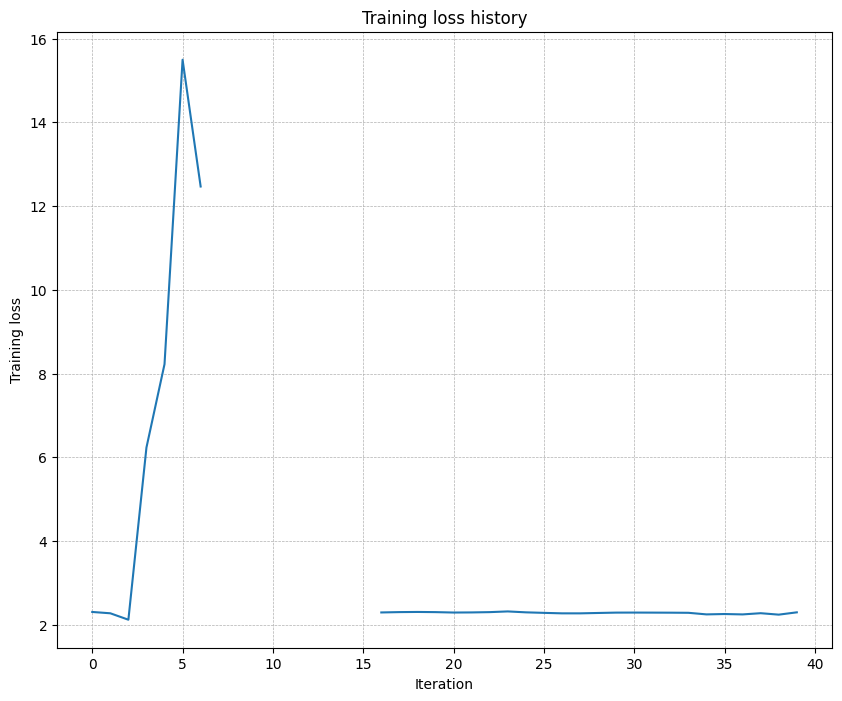

In [5]:
# TODO: Use a three-layer Net to overfit 50 training examples by
# tweaking just the learning rate and initialization scale.

num_train = 50
small_data = {
  "X_train": data["X_train"][:num_train],
  "y_train": data["y_train"][:num_train],
  "X_val": data["X_val"],
  "y_val": data["y_val"],
}

weight_scale = 4e-3   # Experiment with this!
learning_rate = 9e-2  # Experiment with this!
model = FullyConnectedNet(
    [100, 100],
    weight_scale=weight_scale,
    dtype=np.float64
)
solver = Solver(
    model,
    small_data,
    print_every=10,
    num_epochs=20,
    batch_size=25,
    update_rule="sgd",
    optim_config={"learning_rate": learning_rate},
)
solver.train()

plt.plot(solver.loss_history)
plt.title("Training loss history")
plt.xlabel("Iteration")
plt.ylabel("Training loss")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

Now, try to use a five-layer network with 100 units on each layer to overfit on 50 training examples. Again, you will have to adjust the learning rate and weight initialization scale, but you should be able to achieve 100% training accuracy within 20 epochs.

(Iteration 1 / 40) loss: 98.325850
(Epoch 0 / 20) train acc: 0.080000; val_acc: 0.095000
(Epoch 1 / 20) train acc: 0.200000; val_acc: 0.085000
(Epoch 2 / 20) train acc: 0.160000; val_acc: 0.111000
(Epoch 3 / 20) train acc: 0.200000; val_acc: 0.106000
(Epoch 4 / 20) train acc: 0.340000; val_acc: 0.121000
(Epoch 5 / 20) train acc: 0.380000; val_acc: 0.133000
(Iteration 11 / 40) loss: 2.195528
(Epoch 6 / 20) train acc: 0.540000; val_acc: 0.141000
(Epoch 7 / 20) train acc: 0.720000; val_acc: 0.116000
(Epoch 8 / 20) train acc: 0.760000; val_acc: 0.122000
(Epoch 9 / 20) train acc: 0.860000; val_acc: 0.119000
(Epoch 10 / 20) train acc: 0.860000; val_acc: 0.127000
(Iteration 21 / 40) loss: 0.606204
(Epoch 11 / 20) train acc: 0.900000; val_acc: 0.124000
(Epoch 12 / 20) train acc: 0.920000; val_acc: 0.119000
(Epoch 13 / 20) train acc: 0.940000; val_acc: 0.118000
(Epoch 14 / 20) train acc: 0.980000; val_acc: 0.118000
(Epoch 15 / 20) train acc: 0.980000; val_acc: 0.124000
(Iteration 31 / 40) loss:

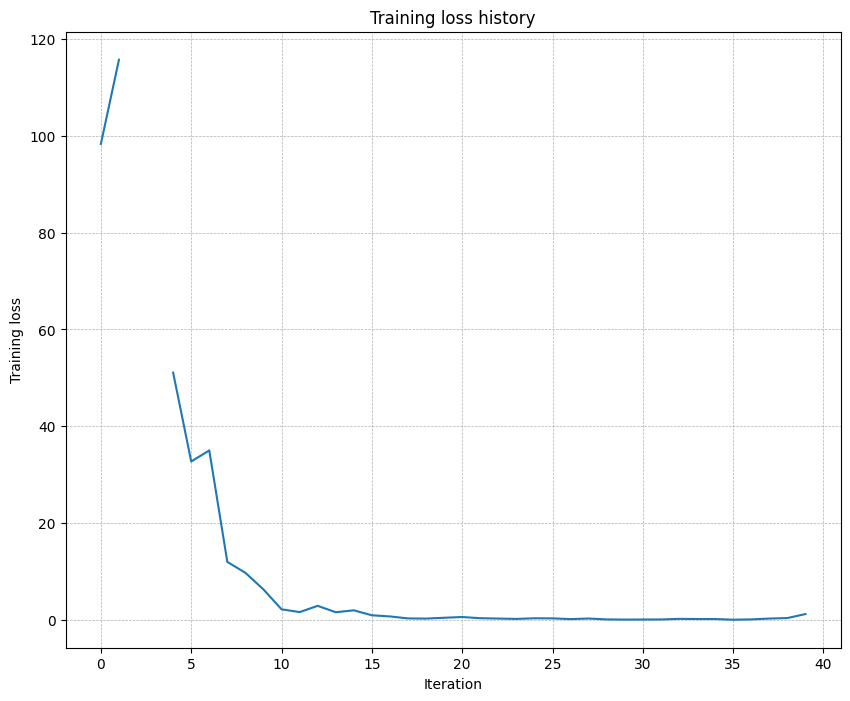

In [6]:
# TODO: Use a five-layer Net to overfit 50 training examples by
# tweaking just the learning rate and initialization scale.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

learning_rate = 4e-3  # Experiment with this!
weight_scale = 9e-2   # Experiment with this!
model = FullyConnectedNet(
    [100, 100, 100, 100],
    weight_scale=weight_scale,
    dtype=np.float64
)
solver = Solver(
    model,
    small_data,
    print_every=10,
    num_epochs=20,
    batch_size=25,
    update_rule='sgd',
    optim_config={'learning_rate': learning_rate},
)
solver.train()

plt.plot(solver.loss_history)
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

## Inline Question 1:
Did you notice anything about the comparative difficulty of training the three-layer network vs. training the five-layer network? In particular, based on your experience, which network seemed more sensitive to the initialization scale? Why do you think that is the case?

## Answer:

5계층을 훈련하여 Overfitting하는 것이 3계층에 대비하여 어렵다. 훨씬 더 많은 계층을 통과하여야 하기 때문에 이 과정에서 gradient가 폭발하거나 소실되는 문제에 빠질 수 있기 때문이다.

# Update rules
So far we have used vanilla stochastic gradient descent (SGD) as our update rule. More sophisticated update rules can make it easier to train deep networks. We will implement a few of the most commonly used update rules and compare them to vanilla SGD.

## SGD+Momentum
Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochastic gradient descent. See the Momentum Update section at http://cs231n.github.io/neural-networks-3/#sgd for more information.

Open the file `cs231n/optim.py` and read the documentation at the top of the file to make sure you understand the API. Implement the SGD+momentum update rule in the function `sgd_momentum` and run the following to check your implementation. You should see errors less than e-8.

In [ ]:
#다음은 정답 코드입니다.
def sgd_momentum(w, dw, config=None):
    """
    Performs stochastic gradient descent with momentum.

    config format:
    - learning_rate: Scalar learning rate.
    - momentum: Scalar between 0 and 1 giving the momentum value.
      Setting momentum = 0 reduces to sgd.
    - velocity: A numpy array of the same shape as w and dw used to store a
      moving average of the gradients.
    """
    if config is None:
        config = {}
    config.setdefault("learning_rate", 1e-2)
    config.setdefault("momentum", 0.9)
    v = config.get("velocity", np.zeros_like(w))

    next_w = None
    ###########################################################################
    # TODO: Implement the momentum update formula. Store the updated value in #
    # the next_w variable. You should also use and update the velocity v.     #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    v = config['momentum'] * v - config['learning_rate'] * dw
    next_w = w + v

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    config["velocity"] = v

    return next_w, config

In [8]:
from cs231n.optim import sgd_momentum

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {"learning_rate": 1e-3, "velocity": v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

# Should see relative errors around e-8 or less
print("next_w error: ", rel_error(next_w, expected_next_w))
print("velocity error: ", rel_error(expected_velocity, config["velocity"]))

next_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


Once you have done so, run the following to train a six-layer network with both SGD and SGD+momentum. You should see the SGD+momentum update rule converge faster.

Running with  sgd
(Iteration 1 / 200) loss: 2.559978
(Epoch 0 / 5) train acc: 0.104000; val_acc: 0.107000
(Iteration 11 / 200) loss: 2.356069
(Iteration 21 / 200) loss: 2.214091
(Iteration 31 / 200) loss: 2.205928
(Epoch 1 / 5) train acc: 0.225000; val_acc: 0.193000
(Iteration 41 / 200) loss: 2.132095
(Iteration 51 / 200) loss: 2.118950
(Iteration 61 / 200) loss: 2.116443
(Iteration 71 / 200) loss: 2.132549
(Epoch 2 / 5) train acc: 0.298000; val_acc: 0.260000
(Iteration 81 / 200) loss: 1.977227
(Iteration 91 / 200) loss: 2.007528
(Iteration 101 / 200) loss: 2.004762
(Iteration 111 / 200) loss: 1.885342
(Epoch 3 / 5) train acc: 0.343000; val_acc: 0.287000
(Iteration 121 / 200) loss: 1.891516
(Iteration 131 / 200) loss: 1.923677
(Iteration 141 / 200) loss: 1.957744
(Iteration 151 / 200) loss: 1.966736
(Epoch 4 / 5) train acc: 0.322000; val_acc: 0.305000
(Iteration 161 / 200) loss: 1.801483
(Iteration 171 / 200) loss: 1.973780
(Iteration 181 / 200) loss: 1.666572
(Iteration 191 / 200) los

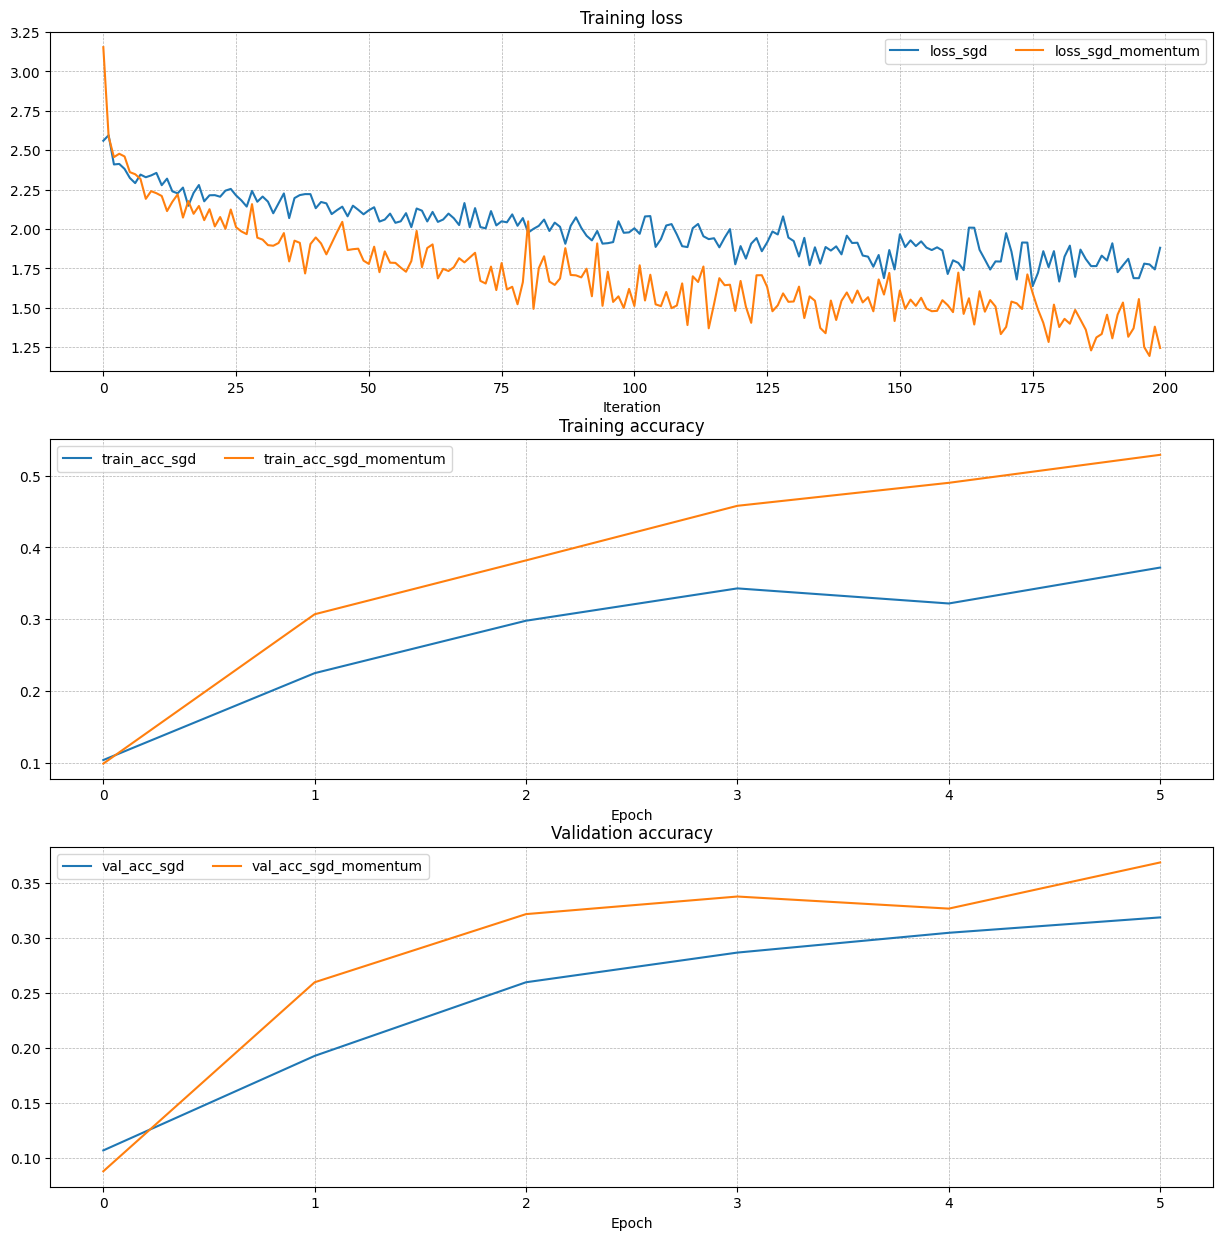

In [9]:
num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum']:
    print('Running with ', update_rule)
    model = FullyConnectedNet(
        [100, 100, 100, 100, 100],
        weight_scale=5e-2
    )

    solver = Solver(
        model,
        small_data,
        num_epochs=5,
        batch_size=100,
        update_rule=update_rule,
        optim_config={'learning_rate': 5e-3},
        verbose=True,
    )
    solvers[update_rule] = solver
    solver.train()

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

axes[0].set_title('Training loss')
axes[0].set_xlabel('Iteration')
axes[1].set_title('Training accuracy')
axes[1].set_xlabel('Epoch')
axes[2].set_title('Validation accuracy')
axes[2].set_xlabel('Epoch')

for update_rule, solver in solvers.items():
    axes[0].plot(solver.loss_history, label=f"loss_{update_rule}")
    axes[1].plot(solver.train_acc_history, label=f"train_acc_{update_rule}")
    axes[2].plot(solver.val_acc_history, label=f"val_acc_{update_rule}")

for ax in axes:
    ax.legend(loc="best", ncol=4)
    ax.grid(linestyle='--', linewidth=0.5)

plt.show()

## RMSProp and Adam
RMSProp [1] and Adam [2] are update rules that set per-parameter learning rates by using a running average of the second moments of gradients.

In the file `cs231n/optim.py`, implement the RMSProp update rule in the `rmsprop` function and implement the Adam update rule in the `adam` function, and check your implementations using the tests below.

**NOTE:** Please implement the _complete_ Adam update rule (with the bias correction mechanism), not the first simplified version mentioned in the course notes.

[1] Tijmen Tieleman and Geoffrey Hinton. "Lecture 6.5-rmsprop: Divide the gradient by a running average of its recent magnitude." COURSERA: Neural Networks for Machine Learning 4 (2012).

[2] Diederik Kingma and Jimmy Ba, "Adam: A Method for Stochastic Optimization", ICLR 2015.

In [ ]:
#다음은 정답 코드입니다.

def rmsprop(w, dw, config=None):
    """
    Uses the RMSProp update rule, which uses a moving average of squared
    gradient values to set adaptive per-parameter learning rates.

    config format:
    - learning_rate: Scalar learning rate.
    - decay_rate: Scalar between 0 and 1 giving the decay rate for the squared
      gradient cache.
    - epsilon: Small scalar used for smoothing to avoid dividing by zero.
    - cache: Moving average of second moments of gradients.
    """
    if config is None:
        config = {}
    config.setdefault("learning_rate", 1e-2)
    config.setdefault("decay_rate", 0.99)
    config.setdefault("epsilon", 1e-8)
    config.setdefault("cache", np.zeros_like(w))

    next_w = None
    ###########################################################################
    # TODO: Implement the RMSprop update formula, storing the next value of w #
    # in the next_w variable. Don't forget to update cache value stored in    #
    # config['cache'].                                                        #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    config['cache'] = config['decay_rate'] * config['cache'] + (1 - config['decay_rate']) * dw**2
    next_w = w - config['learning_rate'] * dw / (np.sqrt(config['cache']) + config['epsilon'])


    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    return next_w, config

In [18]:
# Test RMSProp implementation
from cs231n.optim import rmsprop

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'cache': cache}
next_w, _ = rmsprop(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

# You should see relative errors around e-7 or less
print('next_w error: ', rel_error(expected_next_w, next_w))
print('cache error: ', rel_error(expected_cache, config['cache']))

next_w error:  9.524687511038133e-08
cache error:  2.6477955807156126e-09


In [22]:
#다음은 정답코드입니다.

def adam(w, dw, config=None):
    """
    Uses the Adam update rule, which incorporates moving averages of both the
    gradient and its square and a bias correction term.

    config format:
    - learning_rate: Scalar learning rate.
    - beta1: Decay rate for moving average of first moment of gradient.
    - beta2: Decay rate for moving average of second moment of gradient.
    - epsilon: Small scalar used for smoothing to avoid dividing by zero.
    - m: Moving average of gradient.
    - v: Moving average of squared gradient.
    - t: Iteration number.
    """
    if config is None:
        config = {}
    config.setdefault("learning_rate", 1e-3)
    config.setdefault("beta1", 0.9)
    config.setdefault("beta2", 0.999)
    config.setdefault("epsilon", 1e-8)
    config.setdefault("m", np.zeros_like(w))
    config.setdefault("v", np.zeros_like(w))
    config.setdefault("t", 0)

    next_w = None
    ###########################################################################
    # TODO: Implement the Adam update formula, storing the next value of w in #
    # the next_w variable. Don't forget to update the m, v, and t variables   #
    # stored in config.                                                       #
    #                                                                         #
    # NOTE: In order to match the reference output, please modify t _before_  #
    # using it in any calculations.                                           #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
`   config['t'] += 1
    config['m'] = config['beta1'] * config['m'] + (1-config['beta1']) * dw
    first_unbias = config['m'] / (1-config['beta1']**config['t'])

    config['v'] = config['beta2'] * config['v'] + (1-config['beta2']) *dw**2
    second_unbias = config['v'] / (1-config['beta2']**config['t'])

    next_w = w - config['learning_rate']*first_unbias / (np.sqrt(second_unbias)+config['epsilon'])

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    return next_w, config

In [26]:
# Test Adam implementation
from cs231n.optim import adam

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'm': m, 'v': v, 't': 5}
next_w, _ = adam(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

# You should see relative errors around e-7 or less
print('next_w error: ', rel_error(expected_next_w, next_w))
print('v error: ', rel_error(expected_v, config['v']))
print('m error: ', rel_error(expected_m, config['m']))

next_w error:  1.1395691798535431e-07
v error:  4.208314038113071e-09
m error:  4.214963193114416e-09


Once you have debugged your RMSProp and Adam implementations, run the following to train a pair of deep networks using these new update rules:

Running with  adam
(Iteration 1 / 200) loss: 2.695519
(Epoch 0 / 5) train acc: 0.167000; val_acc: 0.142000
(Iteration 11 / 200) loss: 2.145033
(Iteration 21 / 200) loss: 1.899247
(Iteration 31 / 200) loss: 1.880857
(Epoch 1 / 5) train acc: 0.410000; val_acc: 0.347000
(Iteration 41 / 200) loss: 1.702346
(Iteration 51 / 200) loss: 1.751724
(Iteration 61 / 200) loss: 1.726251
(Iteration 71 / 200) loss: 1.657493
(Epoch 2 / 5) train acc: 0.433000; val_acc: 0.326000
(Iteration 81 / 200) loss: 1.664085
(Iteration 91 / 200) loss: 1.457337
(Iteration 101 / 200) loss: 1.524065
(Iteration 111 / 200) loss: 1.262544
(Epoch 3 / 5) train acc: 0.444000; val_acc: 0.308000
(Iteration 121 / 200) loss: 1.692743
(Iteration 131 / 200) loss: 1.678481
(Iteration 141 / 200) loss: 1.414348
(Iteration 151 / 200) loss: 1.272007
(Epoch 4 / 5) train acc: 0.530000; val_acc: 0.349000
(Iteration 161 / 200) loss: 1.288296
(Iteration 171 / 200) loss: 1.314287
(Iteration 181 / 200) loss: 1.309635
(Iteration 191 / 200) lo

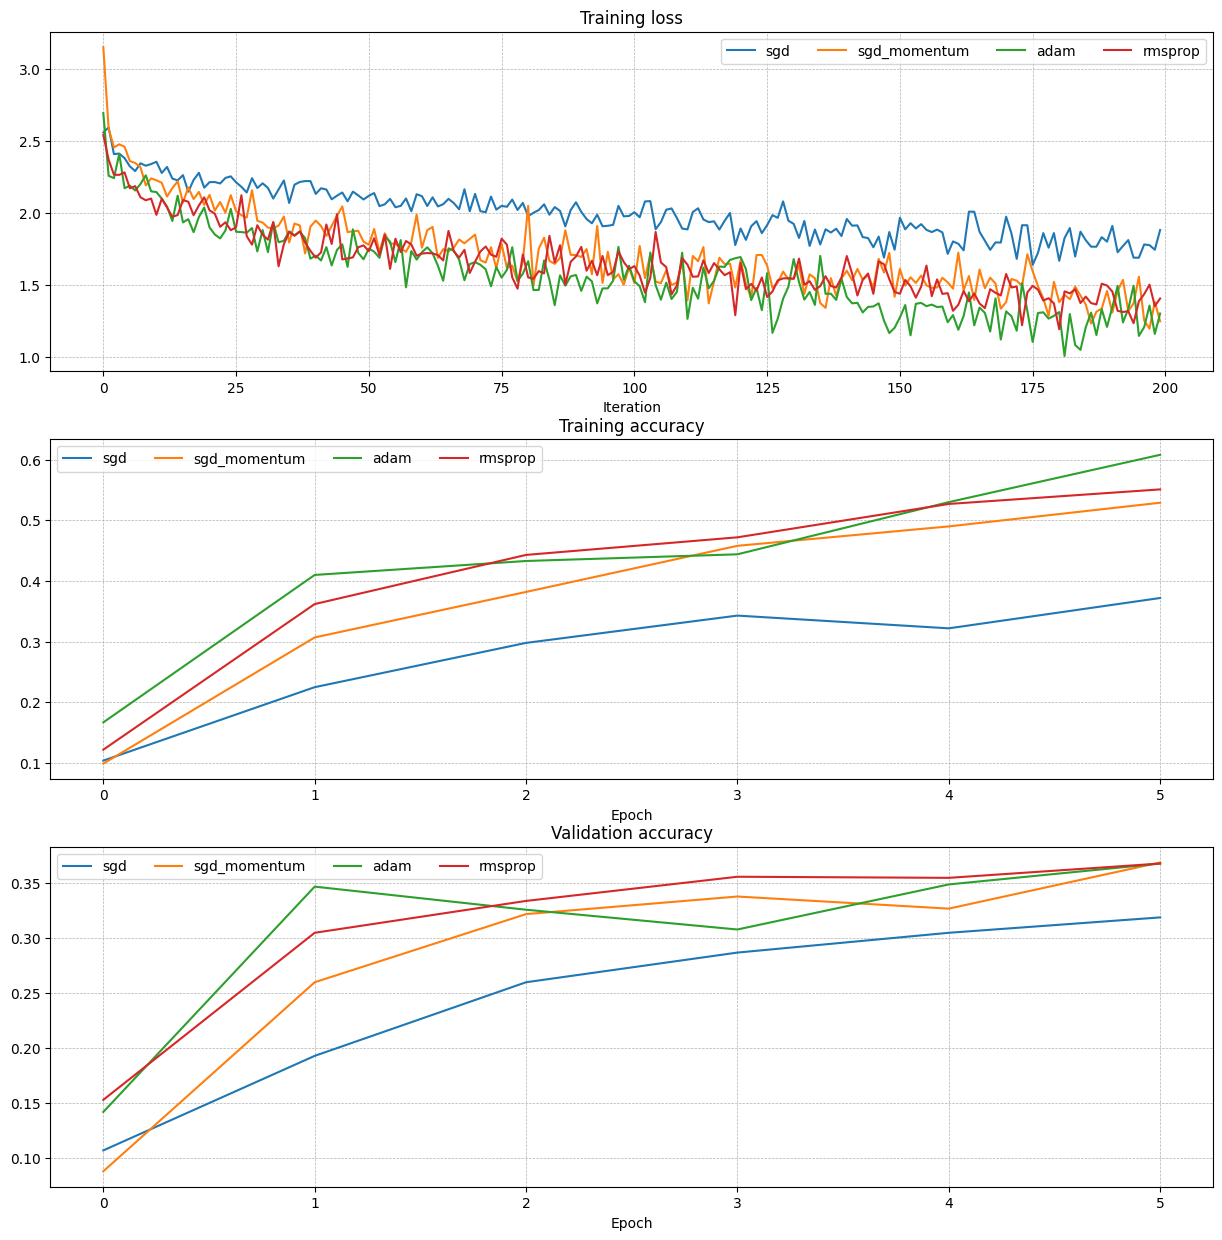

In [27]:
learning_rates = {'rmsprop': 1e-4, 'adam': 1e-3}
for update_rule in ['adam', 'rmsprop']:
    print('Running with ', update_rule)
    model = FullyConnectedNet(
        [100, 100, 100, 100, 100],
        weight_scale=5e-2
    )
    solver = Solver(
        model,
        small_data,
        num_epochs=5,
        batch_size=100,
        update_rule=update_rule,
        optim_config={'learning_rate': learning_rates[update_rule]},
        verbose=True
    )
    solvers[update_rule] = solver
    solver.train()
    print()

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

axes[0].set_title('Training loss')
axes[0].set_xlabel('Iteration')
axes[1].set_title('Training accuracy')
axes[1].set_xlabel('Epoch')
axes[2].set_title('Validation accuracy')
axes[2].set_xlabel('Epoch')

for update_rule, solver in solvers.items():
    axes[0].plot(solver.loss_history, label=f"{update_rule}")
    axes[1].plot(solver.train_acc_history, label=f"{update_rule}")
    axes[2].plot(solver.val_acc_history, label=f"{update_rule}")

for ax in axes:
    ax.legend(loc='best', ncol=4)
    ax.grid(linestyle='--', linewidth=0.5)

plt.show()

## Inline Question 2:

AdaGrad, like Adam, is a per-parameter optimization method that uses the following update rule:

```
cache += dw**2
w += - learning_rate * dw / (np.sqrt(cache) + eps)
```

John notices that when he was training a network with AdaGrad that the updates became very small, and that his network was learning slowly. Using your knowledge of the AdaGrad update rule, why do you think the updates would become very small? Would Adam have the same issue?


## Answer:

AdaGrad는 Velocity대신에 gradient를 제곱하여 합산해서 사용한다. 이는 velocity를 사용하면 overshooting되는 현상을 방지하기 위함이다. 그런데 gradient는 학습을 하며 그 값이 점차 작아지게 된다. 따라서 학습이 더뎌지거나 saddle point에 갇히게 되는 현상이 발생할 수 있다.

Adam의 경우 AdaGrad의 수렴 효율성과 momentum 계열의 local minima(saddle point)
극복 효율성을 결합한 기법이다. 따라서 Adam에서는 AdaGrad와 같은 학습 저하 현상은 발생하지 않는다.


# Train a Good Model!
Train the best fully connected model that you can on CIFAR-10, storing your best model in the `best_model` variable. We require you to get at least 50% accuracy on the validation set using a fully connected network.

If you are careful it should be possible to get accuracies above 55%, but we don't require it for this part and won't assign extra credit for doing so. Later in the assignment we will ask you to train the best convolutional network that you can on CIFAR-10, and we would prefer that you spend your effort working on convolutional networks rather than fully connected networks.

**Note:** You might find it useful to complete the `BatchNormalization.ipynb` and `Dropout.ipynb` notebooks before completing this part, since those techniques can help you train powerful models.

In [29]:
best_model = None

################################################################################
# TODO: Train the best FullyConnectedNet that you can on CIFAR-10. You might   #
# find batch/layer normalization and dropout useful. Store your best model in  #
# the best_model variable.                                                     #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
best_acc = -1

learning_rates = [1e-3, 1e-4]
weight_scale = [5e-2]
dropout_keep_ratio = [1, 0.5]
batch_size = [50,100]
normalize = [True, False]

for lr in learning_rates:
  for w in weight_scale:
    for bs in batch_size:
      for drop_p in dropout_keep_ratio:
        for bn in normalize:
          model = FullyConnectedNet(
                [100, 100, 100, 100, 100],
                weight_scale= w,
                dropout_keep_ratio = drop_p,
                normalization = bn)
          solver = Solver(
              model,
              data,
              num_epochs=10,
              batch_size=bs,
              update_rule='adam',
              optim_config={'learning_rate': lr},
              verbose=False)

          solver.train()

          acc = solver.check_accuracy(data['X_val'], data['y_val'], batch_size = 100)
          print('learning_rates:',lr,'weight_scale:',w, 'batch_size:', bs, 'dropout_ratio:', drop_p, 'batch_norm:', bn, 'acc:',acc)

          if acc > best_acc:
            best_acc = acc
            best_model = model


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

learning_rates: 0.001 weight_scale: 0.05 batch_size: 50 dropout_ratio: 1 batch_norm: True acc: 0.504
learning_rates: 0.001 weight_scale: 0.05 batch_size: 50 dropout_ratio: 1 batch_norm: False acc: 0.51
learning_rates: 0.001 weight_scale: 0.05 batch_size: 50 dropout_ratio: 0.5 batch_norm: True acc: 0.226
learning_rates: 0.001 weight_scale: 0.05 batch_size: 50 dropout_ratio: 0.5 batch_norm: False acc: 0.274
learning_rates: 0.001 weight_scale: 0.05 batch_size: 100 dropout_ratio: 1 batch_norm: True acc: 0.525
learning_rates: 0.001 weight_scale: 0.05 batch_size: 100 dropout_ratio: 1 batch_norm: False acc: 0.538
learning_rates: 0.001 weight_scale: 0.05 batch_size: 100 dropout_ratio: 0.5 batch_norm: True acc: 0.293
learning_rates: 0.001 weight_scale: 0.05 batch_size: 100 dropout_ratio: 0.5 batch_norm: False acc: 0.303
learning_rates: 0.0001 weight_scale: 0.05 batch_size: 50 dropout_ratio: 1 batch_norm: True acc: 0.499
learning_rates: 0.0001 weight_scale: 0.05 batch_size: 50 dropout_ratio: 1 b

# Test Your Model!
Run your best model on the validation and test sets. You should achieve at least 50% accuracy on the validation set.

In [30]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.538
Test set accuracy:  0.524
